<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02272019_2%5D_Tensorflow_Tutorial_L5_Explore_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.


How to detect overfitting ?

*   The accuracy of training is increase but the increment of the validation is decrease.

What cuz overfitting ?

*   the model train for too long though

What cuz underfitting ?

*   the model is over-regularized.
*  the model has simply not been trained long enough

How to prevent overfitting ?

*   The best solution is to use more training data.
*   Use techniques like regularization
  * weight regularization
  * dropout
*  Reduce the size of the model (i.e. the number of learnable parameters in the model (which is determined by the number of layers and the number of units per layer)) - Capacity Control


Deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc2


## Download the IMDB dataset

In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


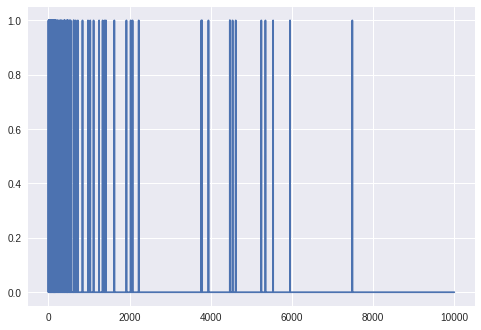

In [0]:
plt.plot(train_data[0])

## Demonstrate overfitting

### Create a baseline model

In [0]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 4s - loss: 0.4570 - acc: 0.8168 - binary_crossentropy: 0.4570 - val_loss: 0.3133 - val_acc: 0.8814 - val_binary_crossentropy: 0.3133
Epoch 2/20
 - 3s - loss: 0.2304 - acc: 0.9172 - binary_crossentropy: 0.2304 - val_loss: 0.2838 - val_acc: 0.8882 - val_binary_crossentropy: 0.2838
Epoch 3/20
 - 3s - loss: 0.1702 - acc: 0.9412 - binary_crossentropy: 0.1702 - val_loss: 0.2996 - val_acc: 0.8814 - val_binary_crossentropy: 0.2996
Epoch 4/20
 - 3s - loss: 0.1382 - acc: 0.9532 - binary_crossentropy: 0.1382 - val_loss: 0.3438 - val_acc: 0.8682 - val_binary_crossentropy: 0.3438
Epoch 5/20
 - 3s - loss: 0.1129 - acc: 0.9630 - binary_crossentropy: 0.1129 - val_loss: 0.3515 - val_acc: 0.8721 - val_binary_crossentropy: 0.3515
Epoch 6/20
 - 3s - loss: 0.0914 - acc: 0.9724 - binary_crossentropy: 0.0914 - val_loss: 0.3846 - val_acc: 0.8694 - val_binary_crossentropy: 0.3846
Epoch 7/20
 - 3s - l

### Create a smaller model

In [0]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [0]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6190 - acc: 0.6221 - binary_crossentropy: 0.6190 - val_loss: 0.5622 - val_acc: 0.7860 - val_binary_crossentropy: 0.5622
Epoch 2/20
 - 3s - loss: 0.5094 - acc: 0.8167 - binary_crossentropy: 0.5094 - val_loss: 0.5035 - val_acc: 0.8370 - val_binary_crossentropy: 0.5035
Epoch 3/20
 - 3s - loss: 0.4542 - acc: 0.8787 - binary_crossentropy: 0.4542 - val_loss: 0.4734 - val_acc: 0.8670 - val_binary_crossentropy: 0.4734
Epoch 4/20
 - 3s - loss: 0.4165 - acc: 0.9083 - binary_crossentropy: 0.4165 - val_loss: 0.4553 - val_acc: 0.8761 - val_binary_crossentropy: 0.4553
Epoch 5/20
 - 3s - loss: 0.3866 - acc: 0.9266 - binary_crossentropy: 0.3866 - val_loss: 0.4451 - val_acc: 0.8760 - val_binary_crossentropy: 0.4451
Epoch 6/20
 - 3s - loss: 0.3619 - acc: 0.9398 - binary_crossentropy: 0.3619 - val_loss: 0.4458 - val_acc: 0.8698 - val_binary_crossentropy: 0.4458
Epoch 7/20
 - 3s - loss: 0.3394 - acc: 0.9509 - binary_crossentropy:

### Create a bigger model

In [0]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [0]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.3433 - acc: 0.8575 - binary_crossentropy: 0.3433 - val_loss: 0.3012 - val_acc: 0.8764 - val_binary_crossentropy: 0.3012
Epoch 2/20
 - 4s - loss: 0.1451 - acc: 0.9474 - binary_crossentropy: 0.1451 - val_loss: 0.3307 - val_acc: 0.8728 - val_binary_crossentropy: 0.3307
Epoch 3/20
 - 4s - loss: 0.0491 - acc: 0.9856 - binary_crossentropy: 0.0491 - val_loss: 0.4383 - val_acc: 0.8683 - val_binary_crossentropy: 0.4383
Epoch 4/20
 - 4s - loss: 0.0077 - acc: 0.9988 - binary_crossentropy: 0.0077 - val_loss: 0.5831 - val_acc: 0.8680 - val_binary_crossentropy: 0.5831
Epoch 5/20
 - 4s - loss: 0.0015 - acc: 0.9999 - binary_crossentropy: 0.0015 - val_loss: 0.6702 - val_acc: 0.8688 - val_binary_crossentropy: 0.6702
Epoch 6/20
 - 4s - loss: 2.7462e-04 - acc: 1.0000 - binary_crossentropy: 2.7462e-04 - val_loss: 0.7093 - val_acc: 0.8686 - val_binary_crossentropy: 0.7093
Epoch 7/20
 - 4s - loss: 1.4524e-04 - acc: 1.0000 - binary_c

## Plot the training and validation loss

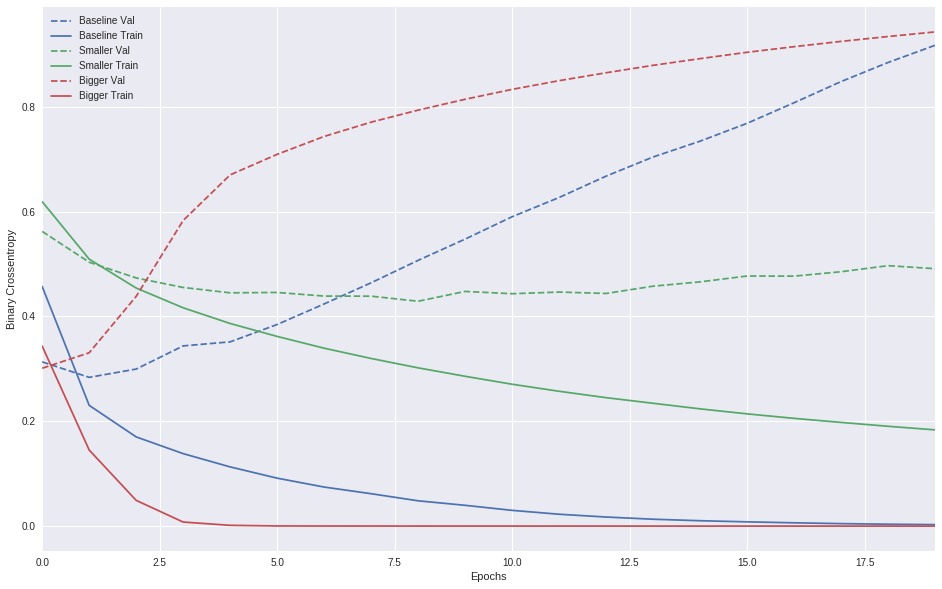

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Strategies - Add weight regularization

L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

In [0]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5162 - acc: 0.8088 - binary_crossentropy: 0.4766 - val_loss: 0.3700 - val_acc: 0.8768 - val_binary_crossentropy: 0.3295
Epoch 2/20
 - 3s - loss: 0.2947 - acc: 0.9089 - binary_crossentropy: 0.2506 - val_loss: 0.3322 - val_acc: 0.8875 - val_binary_crossentropy: 0.2853
Epoch 3/20
 - 3s - loss: 0.2437 - acc: 0.9311 - binary_crossentropy: 0.1945 - val_loss: 0.3357 - val_acc: 0.8857 - val_binary_crossentropy: 0.2849
Epoch 4/20
 - 3s - loss: 0.2211 - acc: 0.9421 - binary_crossentropy: 0.1686 - val_loss: 0.3534 - val_acc: 0.8802 - val_binary_crossentropy: 0.2996
Epoch 5/20
 - 3s - loss: 0.2057 - acc: 0.9492 - binary_crossentropy: 0.1508 - val_loss: 0.3664 - val_acc: 0.8777 - val_binary_crossentropy: 0.3106
Epoch 6/20
 - 3s - loss: 0.1941 - acc: 0.9550 - binary_crossentropy: 0.1372 - val_loss: 0.3792 - val_acc: 0.8748 - val_binary_crossentropy: 0.3218
Epoch 7/20
 - 3s - loss: 0.1865 - acc: 0.9578 - binary_crossentropy:

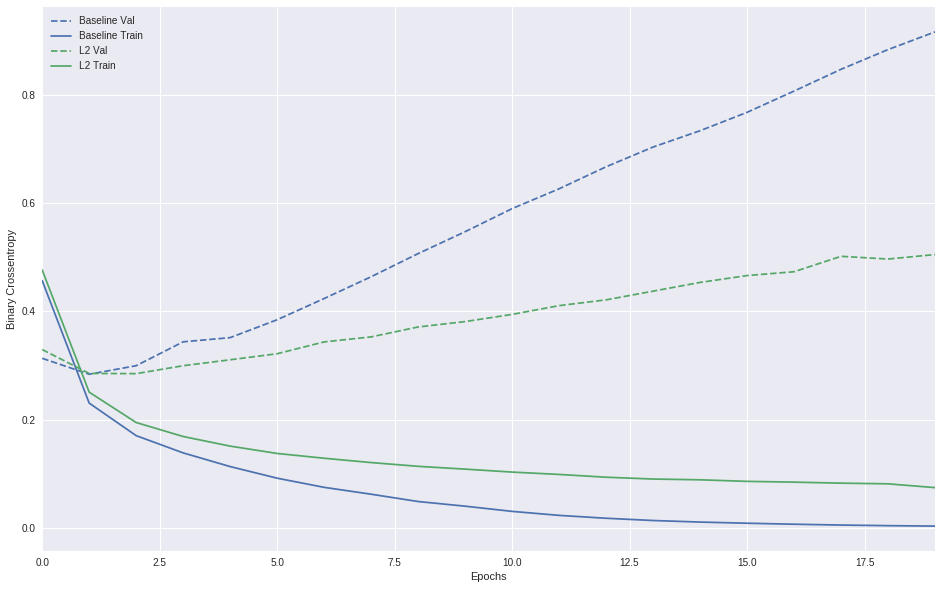

In [0]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

## Strategies - Dropout


*  Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. 
*   it is usually set between 0.2 and 0.5


 
 

In [0]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6122 - acc: 0.6614 - binary_crossentropy: 0.6122 - val_loss: 0.4622 - val_acc: 0.8603 - val_binary_crossentropy: 0.4622
Epoch 2/20
 - 3s - loss: 0.4436 - acc: 0.8088 - binary_crossentropy: 0.4436 - val_loss: 0.3278 - val_acc: 0.8807 - val_binary_crossentropy: 0.3278
Epoch 3/20
 - 3s - loss: 0.3445 - acc: 0.8698 - binary_crossentropy: 0.3445 - val_loss: 0.2827 - val_acc: 0.8880 - val_binary_crossentropy: 0.2827
Epoch 4/20
 - 3s - loss: 0.2813 - acc: 0.9001 - binary_crossentropy: 0.2813 - val_loss: 0.2731 - val_acc: 0.8886 - val_binary_crossentropy: 0.2731
Epoch 5/20
 - 3s - loss: 0.2396 - acc: 0.9169 - binary_crossentropy: 0.2396 - val_loss: 0.2778 - val_acc: 0.8890 - val_binary_crossentropy: 0.2778
Epoch 6/20
 - 3s - loss: 0.2046 - acc: 0.9289 - binary_crossentropy: 0.2046 - val_loss: 0.2891 - val

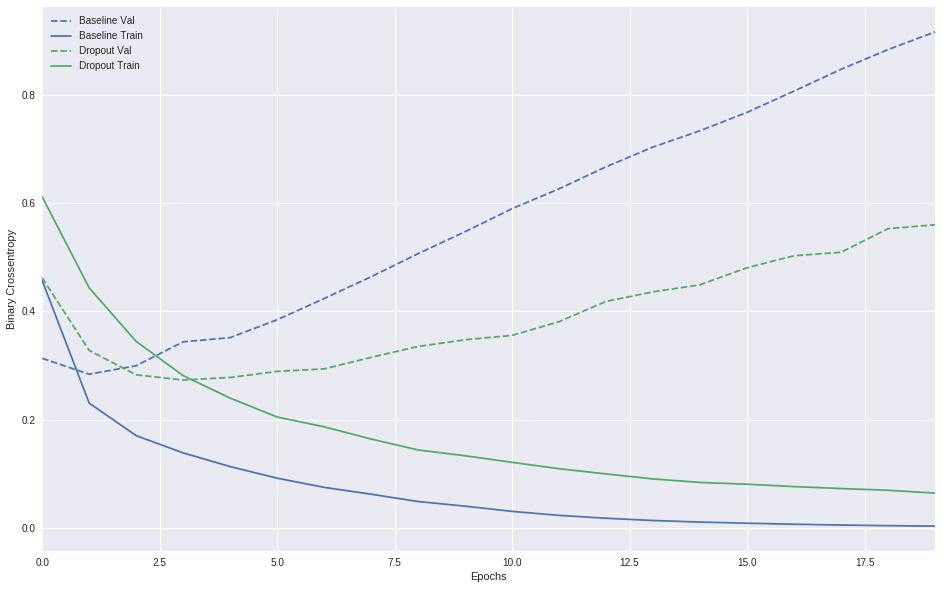

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

To recap: here the most common ways to prevent overfitting in neural networks:

* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.
* Data-augmentation
* Batch normalization.

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.